# <font color='orange'>***1. Download dependencies***</font>

In [ ]:
'''!pip install opendatasets

In [ ]:
'''import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")'''

In [2]:
'''!pip install contractions'''

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
| DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/osx-arm64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/osx-arm64/current_repodata.json HTTP/1.1" 304 0
done
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.

In [6]:
import nltk

In [7]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /Users/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/mac/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/mac/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

# <font color='orange'>***2. Import necessary libraries***</font>

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import contractions
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KDTree
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.neighbors import KernelDensity


# <font color='orange'>***3. Read the dataset***</font>

In [ ]:
'''# The datset directory
dataset_path = '/content/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv'
# Read the dataset in DataFrame
dataset_df = pd.read_csv(dataset_path)
# Show Random sample of data
dataset_df'''

In [41]:
proc_dateset= pd.read_csv('Processes-dataset.csv')
# Show Random sample of data
proc_dateset

,Unnamed: 0,review,sentiment
0,0,one reviewer mention watch oz episode hook rig...,1
1,1,wonderful little production br br film techniq...,1
2,2,think wonderful way spend time hot summer week...,1
3,3,basically family little boy jake think zombie ...,0
4,4,petter mattei love time money visually stunnin...,1
...,...,...,...
49571,49571,think movie right good job creative original f...,1
49572,49572,bad plot bad dialogue bad acting idiotic direc...,0
49573,49573,catholic teach parochial elementary school nun...,0
49574,49574,go disagree previous comment side maltin one s...,0


In [42]:
proc_dateset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49576 entries, 0 to 49575
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  49576 non-null  int64 
 1   review      49576 non-null  object
 2   sentiment   49576 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ MB


In [96]:
proc_dateset = proc_dateset.iloc[0:15000]
proc_dateset.shape

(7000, 3)

# <font color='orange'>***4. Cleaning and preprocessing***</font>

In [49]:
# Remove nan entries
proc_dateset= proc_dateset.dropna()
# Remove duplications in reviews and their coresponding sentiment
proc_dateset = proc_dateset.drop_duplicates(subset=['review'])
# Reste the indicies
proc_dateset.reset_index(drop=True, inplace=True)

In [50]:
proc_dateset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  7000 non-null   int64 
 1   review      7000 non-null   object
 2   sentiment   7000 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 164.2+ KB


**Text Cleaning**

In [51]:
# Get english stop words (most frequent)
stop_words = stopwords.words('english')
# Get WordNetLemmatizer to get the context of words
lemmatizer = WordNetLemmatizer()

In [52]:
# Expand contractions for better Text interpretations and stop words removal
def expand_contractions(text):
    # creating an empty list
    expanded_words1 = []
    for word in text.split():
      # using contractions.fix to expand the shortened words
      expanded_words1.append(contractions.fix(word))

    text = ' '.join(expanded_words1)

    contractions_dict = {
        "'m": " am",
        "'s": " is",
        "'re": " are",
        "'ve": " have",
        "'ll": " will",
        "'d": " would",
    }

    # Case-insensitive flag for the regular expression
    pattern = re.compile(r"\b(" + "|".join(re.escape(key) for key in contractions_dict.keys()) + r")\b", re.IGNORECASE)

    # Replace contractions with their expanded forms
    expanded_text = pattern.sub(lambda match: contractions_dict[match.group(0).lower()], text)

    return expanded_text

In [53]:
text = """
Yahya's playing football.I haven't seen Mary, but I'm sure she'll be at the party.
She's not the only one who won't come.
They're going to the store, aren't they?. Yahya ain't good boy
"""
print('Original Text: ',text)
print()
print('Expanded text:\n',expand_contractions(text))

Original Text:  
Yahya's playing football.I haven't seen Mary, but I'm sure she'll be at the party.
She's not the only one who won't come.
They're going to the store, aren't they?. Yahya ain't good boy


Expanded text:
 Yahya is playing football.I have not seen Mary, but I am sure she will be at the party. She is not the only one who will not come. They are going to the store, are not they?. Yahya are not good boy


In [54]:
# Remove stop words to reduce the dimensionality size and improve total performance
def stopWordsRemoval(sentence):
    filtered_sentence = []
    # Tokenize the sentence
    sentence =  word_tokenize(sentence)
    for w in sentence:
        if w not in stop_words:
            # Only append non stop words
            filtered_sentence.append(w)

    return ' '.join(filtered_sentence)

In [55]:
text = """
Yahya is a good boy.
Soliman and Taha love ML.
Gamal or Fatma were playing an yoga.
"""
print('Original Text: ',text)
print()
print('After stop wors removal:\n',stopWordsRemoval(text))

Original Text:  
Yahya is a good boy.
Soliman and Taha love ML.
Gamal or Fatma were playing an yoga.


After stop wors removal:
 Yahya good boy . Soliman Taha love ML . Gamal Fatma playing yoga .


In [56]:
# This function will be used to help in lemmatization to get pos tag
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [57]:
# For lemmatization (Lemmatization is similar to stemming but it brings context to the words)
def lemmatization(sentence):
    filtered_sentence = []
    sentence = word_tokenize(sentence)
    sentence = pos_tag(sentence)
    tokenCount = len(sentence)
    for i in range (0, tokenCount):
        t = sentence[i][0] # The token
        p = sentence[i][1] # The pos tag
        p = get_wordnet_pos(p)
        l = lemmatizer.lemmatize(t, pos = p)
        filtered_sentence.append(l)

    return ' '.join(filtered_sentence)

In [58]:
lemmatization('is are playing saw had')

'be be play saw have'

**Final preprocessin and cleaning function**

In [59]:
def text_preprocessing(text):
    # Matches Twitter handles.
    text = re.sub("(@[A-Za-z0-9]+)", " ",text)

    # Matches URLs.
    text = re.sub("(\w+:\/\/\S+)", " ",text)

    # Matches Hashtags
    text = re.sub(r'#\w*', ' ' , text)

    # Expand contradictions
    text = expand_contractions(text)

    # Convert text to lowercase
    text = text.lower()

    # Remove stop words like are, is, has ...
    text = stopWordsRemoval(text)

    # Lemmatization brings context to the words
    text = lemmatization(text)

    # Matches special characters letters, spaces, and tabs.
    text = re.sub("([^A-Za-z \t])", " ",text)

    # Remove extra white spaces
    text = " ".join(text.split())

    return text

In [60]:
text = """
Yahya's playing football. I'd played too much.
I'm love 😂🤣❤😘👀 my wife.
I haven't seen Mary, but I'm sure she'll be at the party.
he visit https://www.google.com/ too much.
#BFCAI #CS
@Soliman @Fatma @Gamal @Taha
"""

print('Original Text: ',text)
print()
print('Preprocessed text:\n',text_preprocessing(text))

Original Text:  
Yahya's playing football. I'd played too much.
I'm love 😂🤣❤😘👀 my wife.
I haven't seen Mary, but I'm sure she'll be at the party.
he visit https://www.google.com/ too much.
#BFCAI #CS
@Soliman @Fatma @Gamal @Taha


Preprocessed text:
 yahya play football would play much love wife see mary sure party visit much


**Apply the text preprocessing on the dataset**

In [61]:
proc_dateset['review'] = proc_dateset['review'].apply(text_preprocessing)

In [62]:
# Remove empty reviews entries after processing
proc_dateset2 = proc_dateset[proc_dateset.review != '']

# Remove duplications in reviews and their coresponding sentiment
proc_dateset2 = proc_dateset2.drop_duplicates(subset=['review'])

# Reste the indicies
proc_dateset2.reset_index(drop=True, inplace=True)

In [63]:
proc_dateset2

,Unnamed: 0,review,sentiment
0,0,one reviewer mention watch oz episode hook rig...,1
1,1,wonderful little production br br film techniq...,1
2,2,think wonderful way spend time hot summer week...,1
3,3,basically family little boy jake think zombie ...,0
4,4,petter mattei love time money visually stunnin...,1
...,...,...,...
6995,6995,comparison original series inevitable shame di...,0
6996,6996,meet peter houseman rock star genetic professo...,0
6997,6997,enjoy show year use dream able see share grand...,1
6998,6998,awe wow prepare blow away uncanny way ninja wa...,0


**Encode sentiment labels**

In [64]:
# Make object from label encoder class
lbl_encoder = LabelEncoder()
# Fit the encoder on the sentiment
lbl_encoder.fit(proc_dateset2['sentiment'])
# Transform sentiment classes to 0,1
proc_dateset2['sentiment'] = lbl_encoder.transform(proc_dateset2['sentiment'])

In [65]:
lbl_encoder.classes_

array([0, 1])

0 -> negative classe

1 -> postive class

In [66]:
proc_dateset2

,Unnamed: 0,review,sentiment
0,0,one reviewer mention watch oz episode hook rig...,1
1,1,wonderful little production br br film techniq...,1
2,2,think wonderful way spend time hot summer week...,1
3,3,basically family little boy jake think zombie ...,0
4,4,petter mattei love time money visually stunnin...,1
...,...,...,...
6995,6995,comparison original series inevitable shame di...,0
6996,6996,meet peter houseman rock star genetic professo...,0
6997,6997,enjoy show year use dream able see share grand...,1
6998,6998,awe wow prepare blow away uncanny way ninja wa...,0


In [67]:
# To get most frequent words in every class
def top_words(data):
        words_list = data.split(' ')
        counts = Counter(words_list)
        top_words = counts.most_common(20)
        length_of_list = len(top_words)
        index = np.arange(length_of_list)
        print(top_words)
        count_values = [x[1] for x in top_words]
        count_words = [x[0] for x in top_words]
        fig = plt.figure(figsize = (16,9))
        bar_width = 0.4
        rects1 = plt.bar(index, count_values)
        plt.xticks(index + bar_width, count_words, rotation=0)
        plt.show()

Top words in Positive Sentiment
[('br', 13699), ('film', 6921), ('movie', 6440), ('one', 3944), ('see', 3019), ('make', 2870), ('like', 2714), ('good', 2370), ('time', 2274), ('get', 2262), ('well', 2156), ('great', 1983), ('story', 1983), ('character', 1954), ('would', 1952), ('watch', 1847), ('go', 1808), ('show', 1750), ('love', 1660), ('think', 1560)]


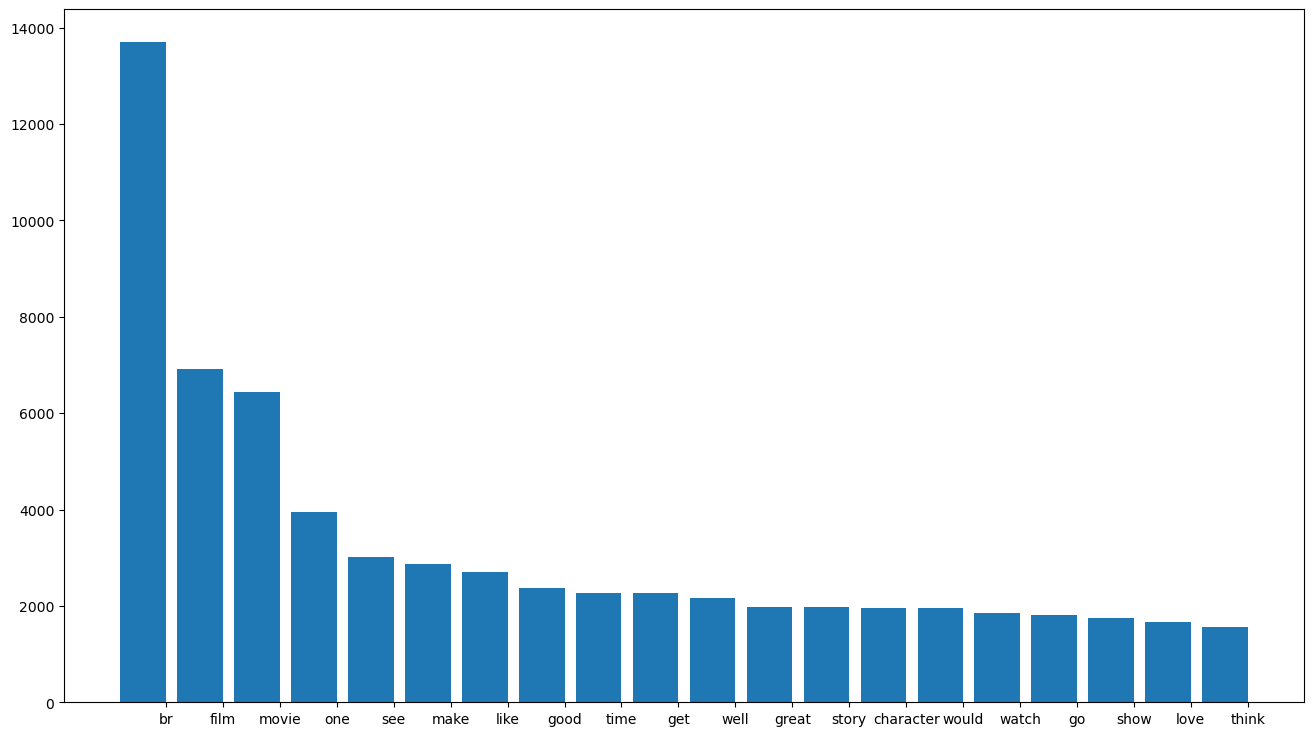

In [68]:
train_positive_sentiment = proc_dateset2[proc_dateset2.sentiment == 1]
positive_words = ' '.join(train_positive_sentiment['review'])
print("Top words in Positive Sentiment")
top_words(positive_words)

Top words in Negative Sentiment
[('br', 15057), ('movie', 8385), ('film', 6315), ('one', 3754), ('make', 3627), ('like', 3466), ('bad', 3022), ('get', 2878), ('see', 2799), ('would', 2613), ('good', 2565), ('even', 2281), ('go', 2268), ('time', 2133), ('watch', 2040), ('character', 1984), ('well', 1750), ('look', 1728), ('think', 1726), ('really', 1704)]


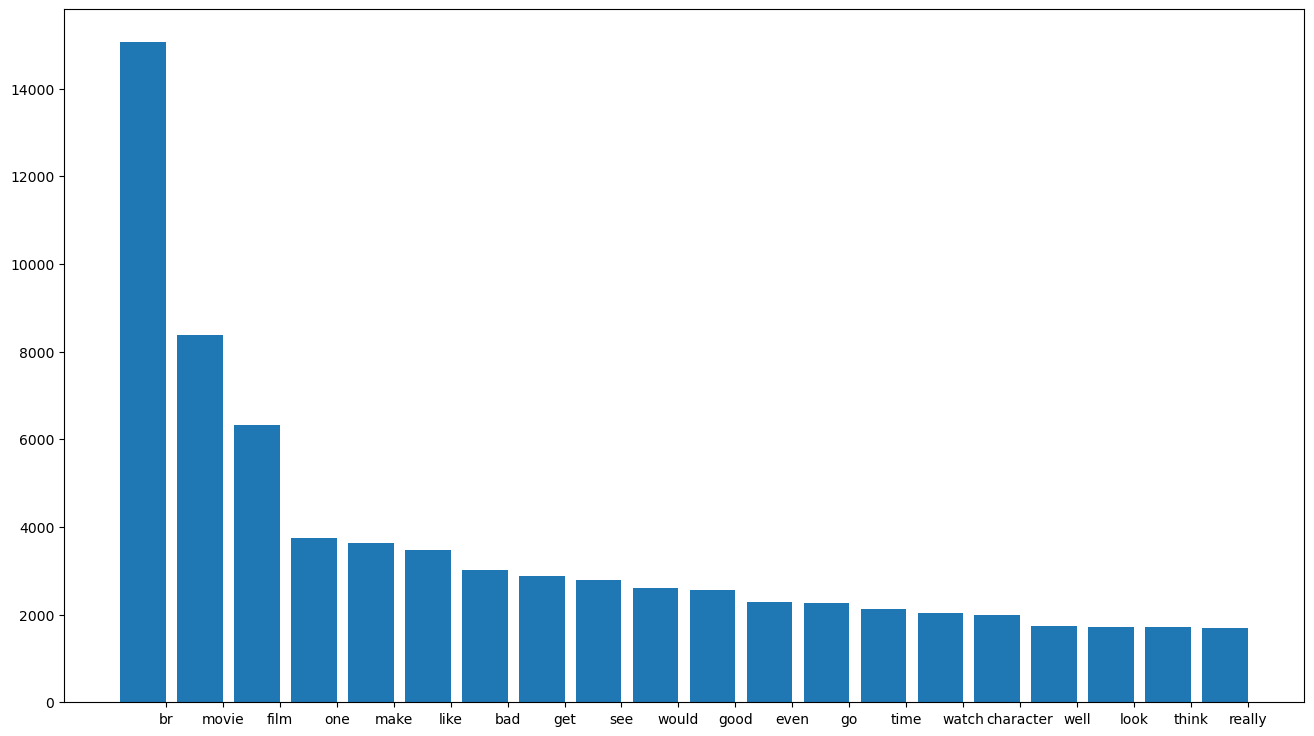

In [69]:
train_negative_sentiment = proc_dateset2[proc_dateset2.sentiment == 0]
negative_words = ' '.join(train_negative_sentiment['review'])
print("Top words in Negative Sentiment")
top_words(negative_words)

In [70]:
# Saving the dataframe
proc_dateset2.to_csv('Processes-dataset.csv')

**Read the processed dataset**

In [71]:
proc_dateset2 = pd.read_csv('Processes-dataset.csv')

proc_dateset2.drop(proc_dateset2.columns[0], axis=1, inplace=True)

proc_dateset2

,Unnamed: 0,review,sentiment
0,0,one reviewer mention watch oz episode hook rig...,1
1,1,wonderful little production br br film techniq...,1
2,2,think wonderful way spend time hot summer week...,1
3,3,basically family little boy jake think zombie ...,0
4,4,petter mattei love time money visually stunnin...,1
...,...,...,...
6995,6995,comparison original series inevitable shame di...,0
6996,6996,meet peter houseman rock star genetic professo...,0
6997,6997,enjoy show year use dream able see share grand...,1
6998,6998,awe wow prepare blow away uncanny way ninja wa...,0


**Split data to train, test and validate**

In [72]:
x, x_test, y, y_test = train_test_split(
    proc_dateset2['review'],
    proc_dateset2['sentiment'],
    test_size=0.2,
    random_state= 42
)

In [73]:
x_train, x_val, y_train, y_val = train_test_split(
    x,
    y,
    test_size=0.33,
    random_state= 42
)

**Get number of rows for each subset**

In [74]:
print(x_train.shape[0])
print(x_val.shape[0])
print(x_test.shape[0])

3752
1848
1400


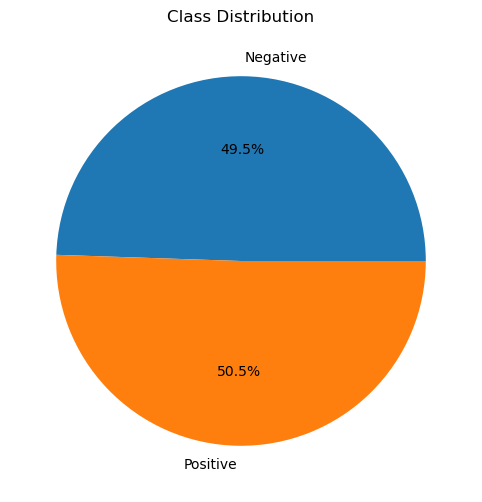

In [75]:
# Map the numerical labels to corresponding categories
classes = {0: 'Negative', 1: 'Positive'}

labels_description = np.array([classes[label] for label in y_train])

# Count the occurrences of each class in the 'labels_description' array
class_counts = np.unique(labels_description, return_counts=True)

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(class_counts[1], labels=class_counts[0], autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

**Encode text using tfidf**

In [76]:
# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the train data
tf_x_train = tfidf_vectorizer.fit_transform(x_train)

In [77]:
print('Number of features is:\n',tfidf_vectorizer.get_feature_names_out().shape)

Number of features is:
 (27142,)


In [78]:
# Transform validation and test data
tf_x_val = tfidf_vectorizer.transform(x_val)
tf_x_test = tfidf_vectorizer.transform(x_test)

## <font color='orange'> ***Train models***</font>

In [57]:
def evaluate_model(model, x_train, y_train, x_val, y_val):
    model.fit(tf_x_train, y_train)
    y_pred_train = model.predict(tf_x_train)
    y_pred_val = model.predict(tf_x_val)
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val = accuracy_score(y_val, y_pred_val)
    return acc_train, acc_val

**Fatma models**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [66]:
model = RandomForestClassifier(max_depth=50,n_estimators=50)
evaluate_model(model, tf_x_train, y_train, tf_x_val, y_val)

(0.9981343283582089, 0.8187229437229437)

In [67]:
model = SVC(kernel='linear')
evaluate_model(model, tf_x_train, y_train, tf_x_val, y_val)

(0.9821428571428571, 0.8841991341991342)

In [68]:
model = XGBClassifier()
evaluate_model(model, tf_x_train, y_train, tf_x_val, y_val)

(0.9976012793176973, 0.8262987012987013)

In [ ]:
model = LogisticRegression()
evaluate_model(model, tf_x_train, y_train, tf_x_val, y_val)

In [ ]:
model = KNeighborsClassifier()
evaluate_model(model, tf_x_train, y_train, tf_x_val, y_val)

In [69]:
# Storing models in a list to loop through them
models_list = [
    RadiusNeighborsClassifier(),
    MultinomialNB(),
    LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42),
    KNeighborsClassifier(),
]

# for each model
for model in models_list:
    # evaluate the model and calculate acc_train and acc_val
    acc_train, acc_val = evaluate_model(
        model,
        tf_x_train,
        y_train,
        tf_x_val,
        y_val
    )
    # Display model name with acc_train and acc_val
    print(model.__class__.__name__)
    print(acc_train, acc_val)
    print('--------------------------')

ValueError: ignored

**Taha Model**


Naive_Bayes

In [79]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_model=MultinomialNB()
naive_bayes_model.fit(tf_x_train, y_train)
y_pred=naive_bayes_model.predict(tf_x_train)
print(accuracy_score(y_train, y_pred))

0.9517590618336887


Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(tf_x_train,y_train)
y_pred = LR.predict(tf_x_train)
print(accuracy_score(y_train, y_pred))

0.945362473347548


Random Forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(tf_x_train, y_train)
y_pred=rfc.predict(tf_x_train)
print(accuracy_score(y_train, y_pred))

1.0


NearestCentroid

In [89]:
from sklearn.neighbors import NearestCentroid
KNN = NearestCentroid()
KNN.fit(tf_x_train, y_train)
y_pred=KNN.predict(tf_x_train)
print(accuracy_score(y_train, y_pred))

0.820362473347548


XGB

In [93]:
from xgboost import XGBClassifier
XGB = XGBClassifier()
XGB.fit(tf_x_train, y_train)
y_pred=XGB.predict(tf_x_train)
print(accuracy_score(y_train, y_pred))

/Users/mac/anaconda3/envs/myd/lib/python3.11/site-packages/xgboost/data.py:427: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


1.0


Support Vector

In [95]:
from sklearn import svm
S1 = svm.SVC()
S1.fit(tf_x_train, y_train)
y_pred=S1.predict(tf_x_train)
print(accuracy_score(y_train, y_pred))

1.0
